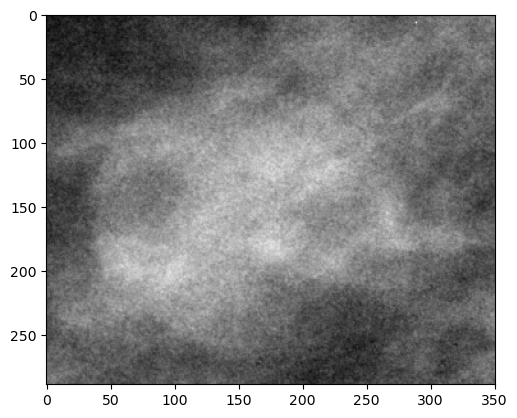

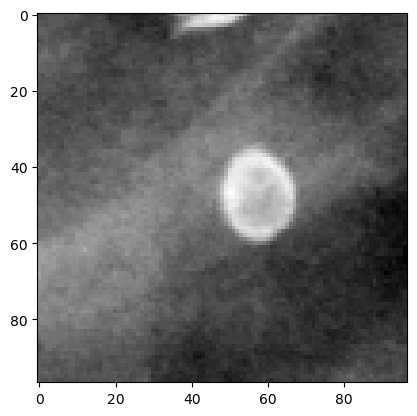

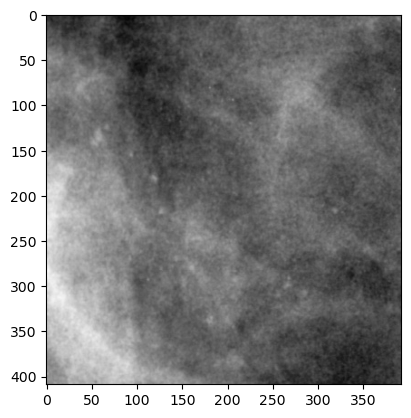

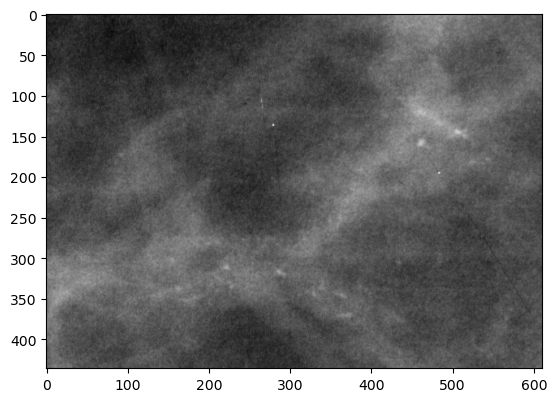

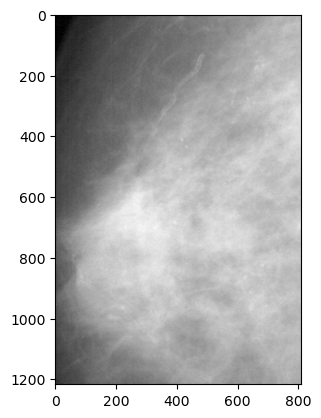

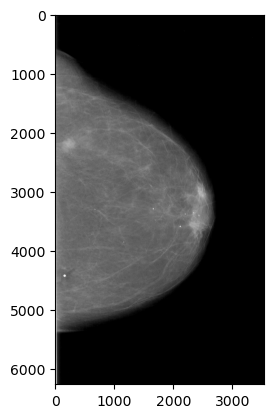

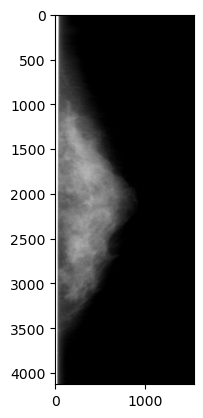

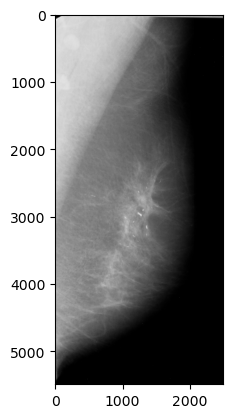

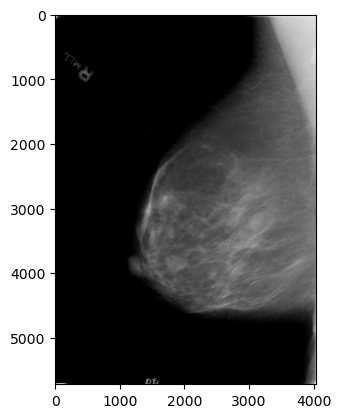

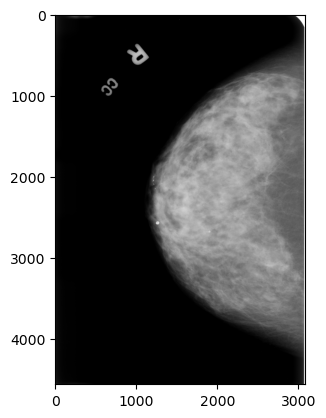

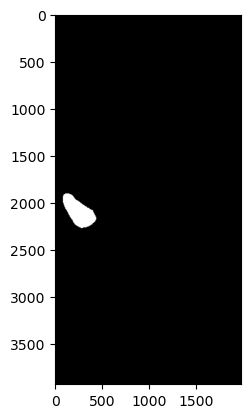

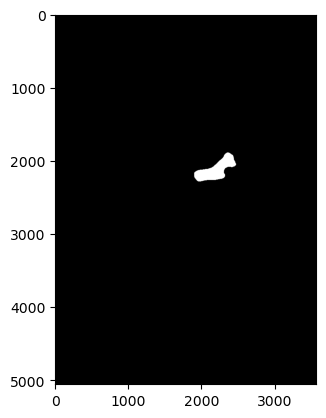

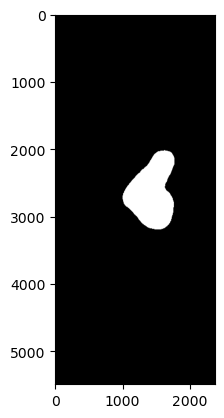

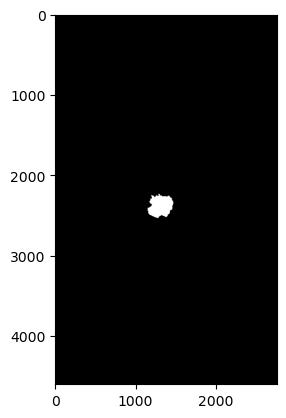

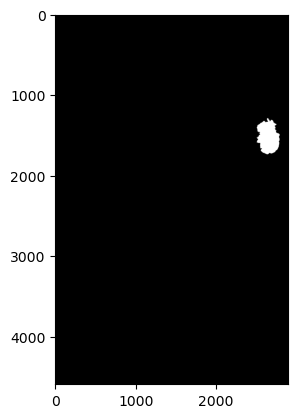

C:\Users\aarya\AppData\Local\Temp\ipykernel_5932\1057833485.py:63: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method='bfill', axis=0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_5932\1057833485.py:64: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['Laterality'].fillna(method='bfill', axis=0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_5932\1057833485.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method='bfill', axis=0, inplace=True)
C:\Users\aarya\AppData\Local\Temp\ipykernel_5932\1057833485.py:85: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future vers

Number of Images of no cancer: 198738
Number of Images of cancer: 78786
Total Number of Images: 277524


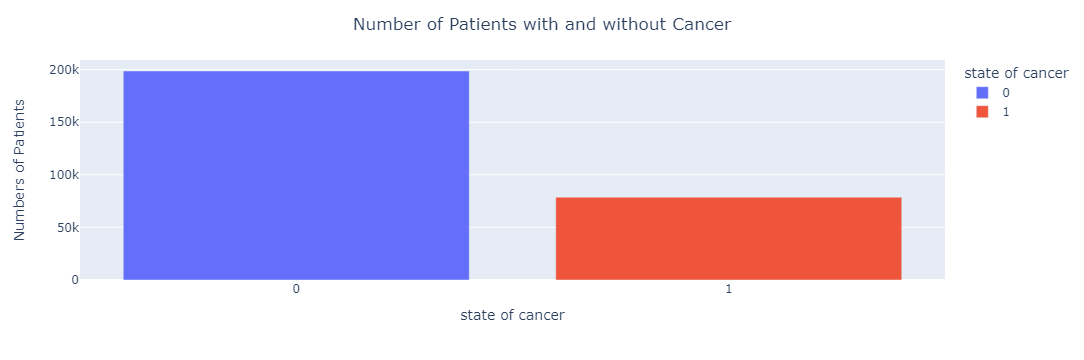

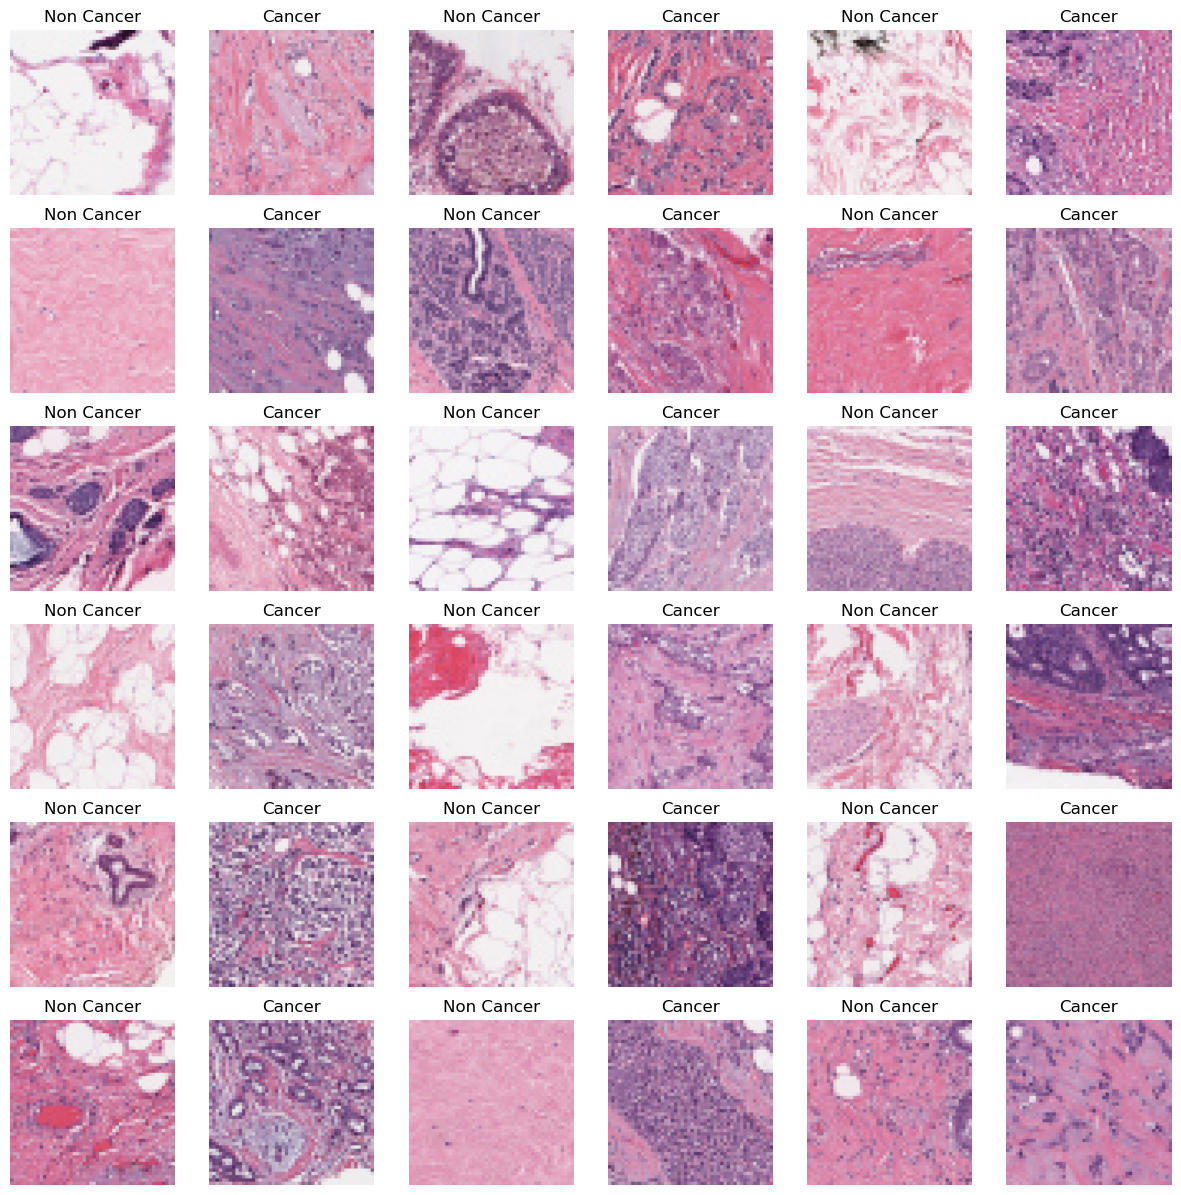

X shape: (277524, 50, 50, 3)
X_train shape: (194266, 50, 50, 3)
X_test shape: (83258, 50, 50, 3)
y_train shape: (194266, 2)
y_test shape: (83258, 2)


In [1]:
import pandas as pd
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir

# Set seed for reproducibility
random.seed(100)
np.random.seed(100)

# Load DICOM data
dicom_data = pd.read_csv('DataSet/csv/dicom_info.csv')
dicom_data.head()

# Filter and display cropped images
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', 'DataSet/jpeg'))

for file in cropped_images.head(5):
    cropped_images_show = Image.open(file)
    gray_img = cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')
    plt.show()

# Filter and display full mammogram images
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', 'DataSet/jpeg'))

for file in full_mammogram_images.head(5):
    full_mammogram_images_show = Image.open(file)
    gray_img = full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')
    plt.show()

# Filter and display ROI mask images
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', 'DataSet/jpeg'))

for file in ROI_mask_images.head(5):
    ROI_mask_images_show = Image.open(file)
    gray_img = ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')
    plt.show()

# Load additional datasets
data_1 = pd.read_csv('DataSet/csv/calc_case_description_train_set.csv')
data_2 = pd.read_csv('DataSet/csv/mass_case_description_train_set.csv')

# Data cleaning for dicom_data
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.drop(['PatientBirthDate', 'AccessionNumber', 'Columns', 'ContentDate', 'ContentTime', 'PatientSex', 
                          'PatientBirthDate', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 
                          'StudyDate', 'StudyID', 'StudyInstanceUID', 'StudyTime', 'InstanceNumber', 'SeriesInstanceUID', 
                          'SeriesNumber'], axis=1, inplace=True)

dicom_cleaning_data['SeriesDescription'].fillna(method='bfill', axis=0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method='bfill', axis=0, inplace=True)

# Data cleaning for data_1
Data_cleaning_1 = data_1.copy()
Data_cleaning_1.rename(columns={
    'calc type': 'calc_type',
    'calc distribution': 'calc_distribution',
    'image view': 'image_view',
    'left or right breast': 'left_or_right_breast',
    'breast density': 'breast_density',
    'abnormality type': 'abnormality_type'
}, inplace=True)

Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

Data_cleaning_1['calc_type'].fillna(method='bfill', axis=0, inplace=True)
Data_cleaning_1['calc_distribution'].fillna(method='bfill', axis=0, inplace=True)

# Data cleaning for data_2
Data_cleaning_2 = data_2.copy()
Data_cleaning_2.rename(columns={
    'mass shape': 'mass_shape',
    'left or right breast': 'left_or_right_breast',
    'mass margins': 'mass_margins',
    'image view': 'image_view',
    'abnormality type': 'abnormality_type'
}, inplace=True)

Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

Data_cleaning_2['mass_shape'].fillna(method='bfill', axis=0, inplace=True)
Data_cleaning_2['mass_margins'].fillna(method='bfill', axis=0, inplace=True)

# Breast histopathology images processing
breast_img = glob.glob('DataSet/Breast Histopathology Images/IDC_regular_ps50_idx5/**/*.png', recursive=True)

non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0':
        non_can_img.append(img)
    elif img[-5] == '1':
        can_img.append(img)

non_can_num = len(non_can_img)
can_num = len(can_img)
total_img_num = non_can_num + can_num

print('Number of Images of no cancer:', non_can_num)
print('Number of Images of cancer:', can_num)
print('Total Number of Images:', total_img_num)

# Plot number of patients with and without cancer
data_insight_1 = pd.DataFrame({'state of cancer': ['0', '1'], 'Numbers of Patients': [198738, 78786]})
colors = px.colors.qualitative.Plotly

bar = px.bar(data_frame=data_insight_1, x='state of cancer', y='Numbers of Patients', color='state of cancer', color_discrete_sequence=colors)
bar.update_layout(title_text='Number of Patients with and without Cancer', title_x=0.5)
bar.show()

# Display random samples of non-cancer and cancer images
from keras.preprocessing import image

plt.figure(figsize=(15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    img = image.load_img((non_can_img[num]), target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2*s+1)
    plt.axis('off')
    plt.title('Non Cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

s = 1
for num in some_can:
    img = image.load_img((can_img[num]), target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2*s)
    plt.axis('off')
    plt.title('Cancer')
    plt.imshow(img.astype('uint8'))
    s += 1

plt.show()

# Prepare images for model training
some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in some_can_img:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

# Combine and shuffle image data
breast_img_arr = non_img_arr + can_img_arr
random.shuffle(breast_img_arr)

X = []
y = []

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape:', X.shape)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# For simplicity, let's select only two classes (e.g., class 0 and class 1) to make it a binary classification problem
class_0 = 0
class_1 = 1

# Filter the dataset to include only the selected classes
train_filter = np.where((y_train == class_0) | (y_train == class_1))[0]
test_filter = np.where((y_test == class_0) | (y_test == class_1))[0]

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

# Further reduce the dataset size for faster training
X_train, y_train = X_train[:5000], y_train[:5000]  # use a smaller subset of the training set
X_test, y_test = X_test[:1000], y_test[:1000]  # use a smaller subset of the test set

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

# Reshape image data for RNN input
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2], X_train.shape[3])
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2], X_test.shape[3])

# Define the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=5, batch_size=256, validation_data=(X_test_rnn, y_test))

# Evaluate the model
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
conf_matrix = confusion_matrix(y_test_labels, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


C:\Users\aarya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 7s/step - accuracy: 0.5978 - loss: 0.6689 - val_accuracy: 0.7380 - val_loss: 0.5547
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step - accuracy: 0.7000 - loss: 0.5806 - val_accuracy: 0.7590 - val_loss: 0.5155
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.7409 - loss: 0.5359 - val_accuracy: 0.7720 - val_loss: 0.4965
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.7487 - loss: 0.5260 - val_accuracy: 0.7710 - val_loss: 0.4886
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.7699 - loss: 0.5006 - val_accuracy: 0.7830 - val_loss: 0.4760
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step
Accuracy: 0.783
Precision: 0.7655677655677655
Recall: 0.8244575936883629
Confusion Matrix:
 [[365 128]
 [ 89 418]]


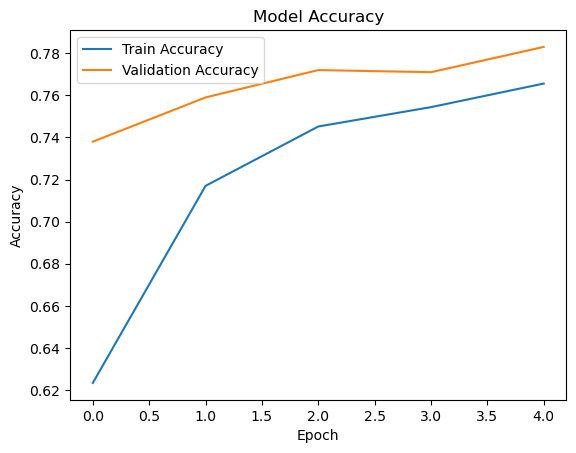

In [3]:
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


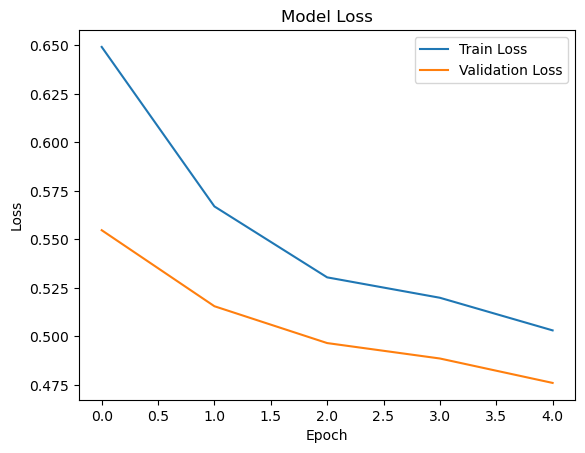

In [4]:
# Plotting model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
